In [1]:
!git clone https://github.com/Janhvesh-Patil/Spam-Detector.git

Cloning into 'Spam-Detector'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 208.74 KiB | 1.59 MiB/s, done.


In [2]:
import chardet

with open("Spam-Detector/spam.csv", 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7261670208776098, 'language': ''}


In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv("Spam-Detector/spam.csv", encoding=result['encoding'])

In [5]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
dataset.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
total_ham = 0
total_spam = 0
for label in dataset["v1"]:
  if label == "ham":
    total_ham += 1
  else:
    total_spam += 1

percent_ham = (total_ham / (total_ham + total_spam)) * 100
print("% ham : ", percent_ham)

percent_spam = (total_spam / (total_ham + total_spam)) * 100
print("% spam : ", percent_spam)

% ham :  86.59368269921033
% spam :  13.406317300789663


In [9]:
dataset = dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [10]:
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
dataset.columns = ["label", "message"]

In [12]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
total_duplicates = dataset.duplicated(subset=['message'], keep=False).sum()
print("Total duplicates : ", total_duplicates)

Total duplicates :  684


In [14]:
label_values = set(dataset["label"])
print(label_values)

{'spam', 'ham'}


In [15]:
duplicates = dataset[dataset.duplicated(subset=['message'], keep=False)]
print(duplicates['label'].value_counts())

label
ham     503
spam    181
Name: count, dtype: int64


In [16]:
duplicate_messages = duplicates['message'].nunique()

In [17]:
duplicate_messages

281

In [18]:
dataset = dataset.drop_duplicates(subset=['message'], keep='first')

In [19]:
print(f"Dataset shape after removing duplicates: {dataset.shape}")
print(f"\nNew class distribution:\n{dataset['label'].value_counts()}")

Dataset shape after removing duplicates: (5169, 2)

New class distribution:
label
ham     4516
spam     653
Name: count, dtype: int64


In [20]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
dataset.sample(30)

,label,message
4716,ham,"K will do, addie &amp; I are doing some art so..."
4707,ham,"Did you say bold, then torch later. Or one tor..."
1247,ham,Horrible gal. Me in sch doing some stuff. How ...
1596,spam,As a Registered Subscriber yr draw 4 a å£100 g...
520,ham,But that's on ebay it might be less elsewhere.
451,ham,Thanks for this hope you had a good day today
5401,ham,Babes I think I got ur brolly I left it in Eng...
3341,ham,You will go to walmart. I.ll stay.
485,ham,If we win its really no 1 side for long time.
2379,ham,"Good evening Sir, hope you are having a nice d..."


In [22]:
max_length = 0
for message in dataset["message"]:
  if len(message) > max_length:
    max_length = len(message)

print("Max length : ", max_length)

Max length :  910


In [23]:
dataset['length'] = dataset['message'].str.len()

/tmp/ipython-input-5254128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['length'] = dataset['message'].str.len()


In [24]:
dataset

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [25]:
print(dataset["length"].describe())

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: length, dtype: float64


In [26]:
print(len(dataset[dataset["length"] < 5]))

9


In [27]:
print(len(dataset[dataset["length"] > 150]))

663


In [28]:
empty_messages = dataset[dataset['message'].str.strip() == '']
print(f"Empty messages: {len(empty_messages)}")

Empty messages: 0


In [29]:
import matplotlib.pyplot as plt

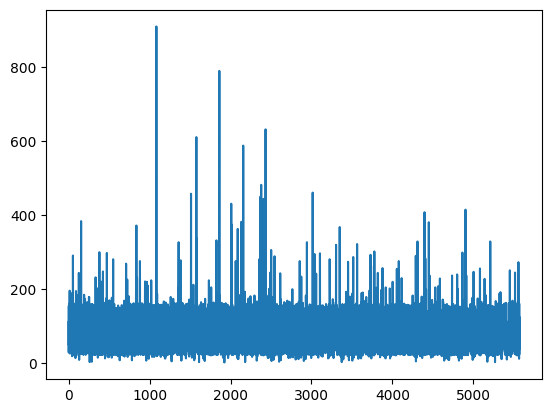

In [30]:
plt.plot(dataset["length"])

In [31]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

In [32]:
# Count of each class
class_counts = dataset['label'].value_counts()

In [33]:
class_counts

,count
label,
ham,4516
spam,653


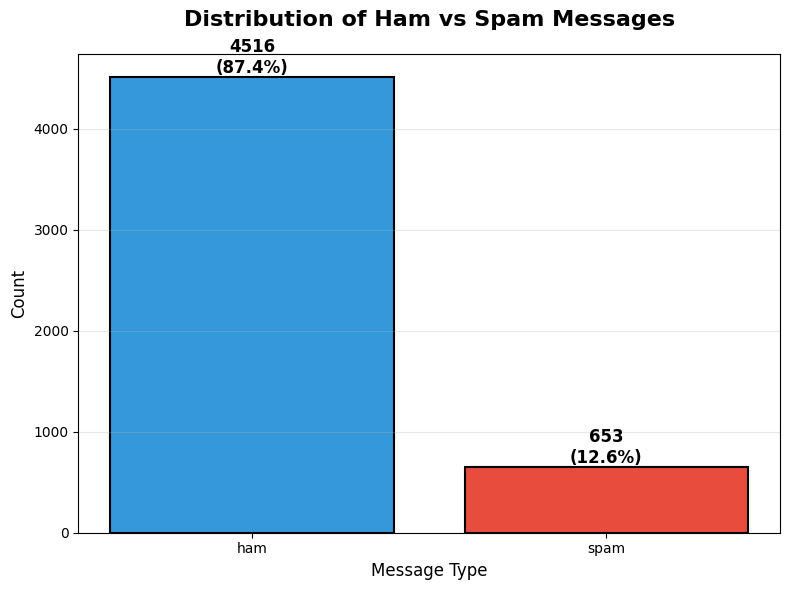

In [34]:
plt.figure(figsize=(8, 6))
colors = ['#3498db', '#e74c3c']
bars = plt.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black', linewidth=1.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(dataset)*100:.1f}%)',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribution of Ham vs Spam Messages', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Message Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
ham_lengths = dataset[dataset['label'] == 'ham']['length']
spam_lengths = dataset[dataset['label'] == 'spam']['length']

In [36]:
def get_box_stats(data):
    return {
        'min': data.min(),
        'q1': data.quantile(0.25),
        'median': data.median(),
        'q3': data.quantile(0.75),
        'max': data.max()
    }

In [37]:
ham_stats = get_box_stats(ham_lengths)
spam_stats = get_box_stats(spam_lengths)

/tmp/ipython-input-2831415790.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, positions=positions, labels=labels, patch_artist=True,


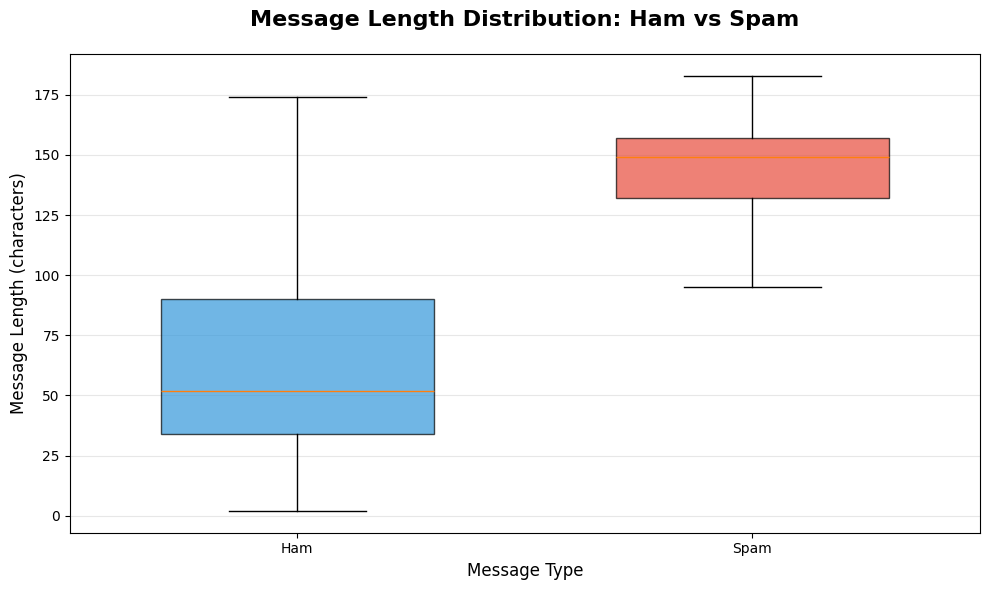

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

box_data = [ham_lengths, spam_lengths]
positions = [1, 2]
labels = ['Ham', 'Spam']
colors = ['#3498db', '#e74c3c']

bp = ax.boxplot(box_data, positions=positions, labels=labels, patch_artist=True,
                widths=0.6, showfliers=False)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Message Length Distribution: Ham vs Spam', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Message Length (characters)', fontsize=12)
ax.set_xlabel('Message Type', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [39]:
print(f"Ham  - Mean: {ham_lengths.mean():.2f}, Median: {ham_stats['median']:.2f}")
print(f"Spam - Mean: {spam_lengths.mean():.2f}, Median: {spam_stats['median']:.2f}")

Ham  - Mean: 70.46, Median: 52.00
Spam - Mean: 137.89, Median: 149.00


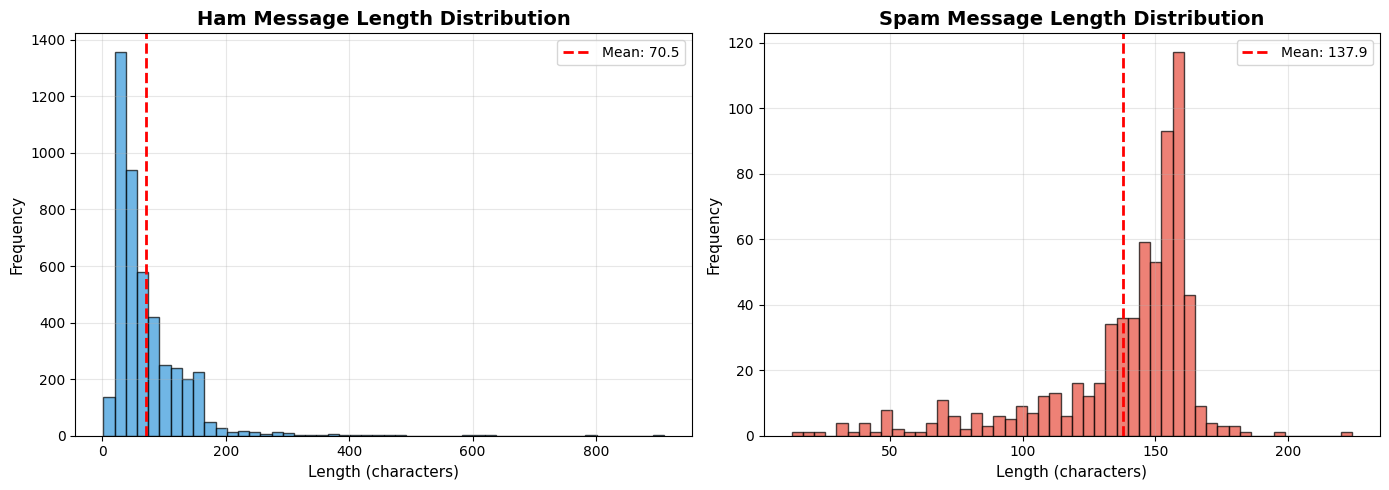

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ham histogram
axes[0].hist(ham_lengths, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[0].set_title('Ham Message Length Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Length (characters)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].axvline(ham_lengths.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {ham_lengths.mean():.1f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Spam histogram
axes[1].hist(spam_lengths, bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('Spam Message Length Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Length (characters)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].axvline(spam_lengths.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {spam_lengths.mean():.1f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [41]:
from collections import Counter
import re

stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for',
             'of', 'with', 'is', 'was', 'are', 'been', 'be', 'have', 'has', 'had',
             'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might',
             'i', 'you', 'he', 'she', 'it', 'we', 'they', 'my', 'your', 'this', 'that'}

In [42]:
def get_top_words(messages, n=15):
    text = ' '.join(messages.values).lower()
    words = re.findall(r'\b[a-z]{3,}\b', text)
    words = [word for word in words if word not in stopwords]
    word_freq = Counter(words)
    return word_freq.most_common(n)

In [43]:
spam_messages = dataset[dataset['label'] == 'spam']['message']
ham_messages = dataset[dataset['label'] == 'ham']['message']

spam_top_words = get_top_words(spam_messages)
ham_top_words = get_top_words(ham_messages)

In [44]:
spam_messages

,message
2,Free entry in 2 a wkly comp to win FA Cup fina...
5,FreeMsg Hey there darling it's been 3 week's n...
8,WINNER!! As a valued network customer you have...
9,Had your mobile 11 months or more? U R entitle...
11,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,Had your contract mobile 11 Mnths? Latest Moto...
5566,REMINDER FROM O2: To get 2.50 pounds free call...


In [45]:
spam_top_words

[('call', 309),
 ('free', 195),
 ('now', 164),
 ('txt', 134),
 ('from', 122),
 ('mobile', 109),
 ('stop', 109),
 ('text', 108),
 ('claim', 96),
 ('reply', 96),
 ('www', 83),
 ('prize', 82),
 ('our', 77),
 ('get', 71),
 ('only', 70)]

In [46]:
spam_words = [word for word, count in spam_top_words]
spam_counts = [count for word, count in spam_top_words]

ham_words = [word for word, count in ham_top_words]
ham_counts = [count for word, count in ham_top_words]

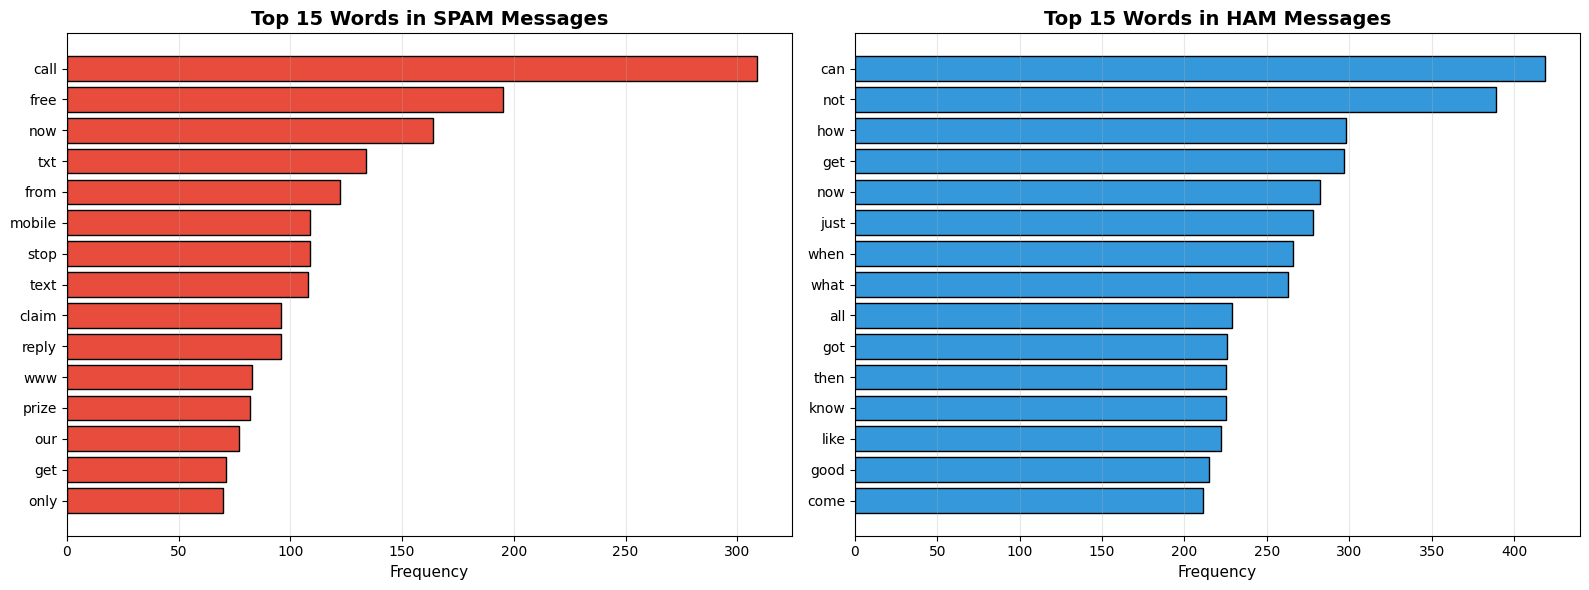

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Spam top words
axes[0].barh(range(len(spam_words)), spam_counts, color='#e74c3c', edgecolor='black')
axes[0].set_yticks(range(len(spam_words)))
axes[0].set_yticklabels(spam_words)
axes[0].set_title('Top 15 Words in SPAM Messages', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency', fontsize=11)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Ham top words
axes[1].barh(range(len(ham_words)), ham_counts, color='#3498db', edgecolor='black')
axes[1].set_yticks(range(len(ham_words)))
axes[1].set_yticklabels(ham_words)
axes[1].set_title('Top 15 Words in HAM Messages', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency', fontsize=11)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
dataset.loc[:, 'exclamation_count'] = dataset['message'].str.count('!')
dataset.loc[:, 'question_count'] = dataset['message'].str.count(r'\?')
dataset.loc[:, 'capital_count'] = dataset['message'].apply(lambda x: sum(1 for c in x if c.isupper()))


/tmp/ipython-input-1176750166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'exclamation_count'] = dataset['message'].str.count('!')
/tmp/ipython-input-1176750166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'question_count'] = dataset['message'].str.count(r'\?')
/tmp/ipython-input-1176750166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [49]:
punct_stats = dataset.groupby('label')[['exclamation_count', 'question_count', 'capital_count']].mean()

In [50]:
punct_stats

,exclamation_count,question_count,capital_count
label,,,
ham,0.174712,0.292958,3.904340
spam,0.693721,0.243492,15.246554


In [51]:
import numpy as np

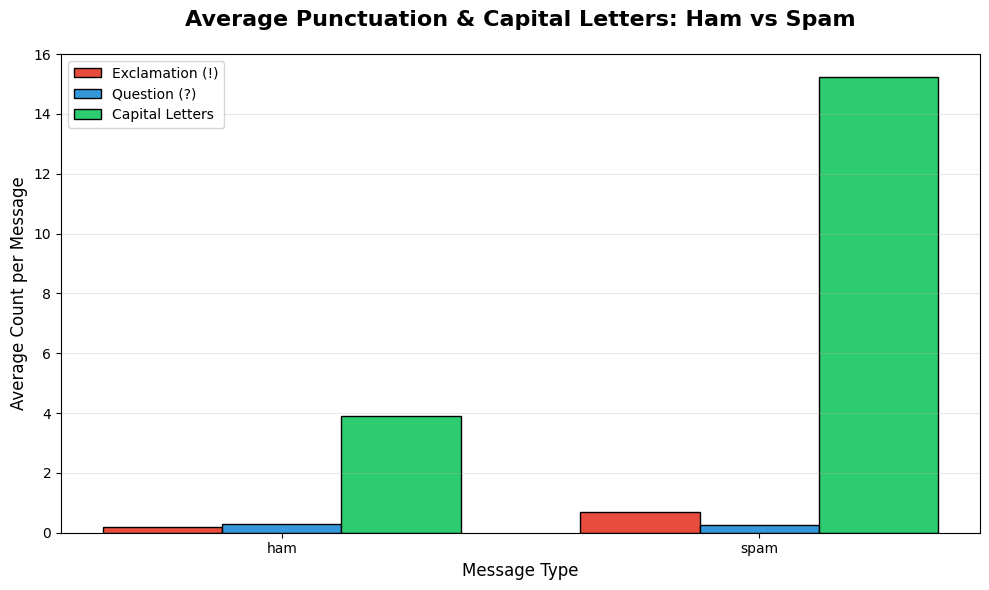

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(punct_stats.index))
width = 0.25

bars1 = ax.bar(x - width, punct_stats['exclamation_count'], width, label='Exclamation (!)', color='#e74c3c', edgecolor='black')
bars2 = ax.bar(x, punct_stats['question_count'], width, label='Question (?)', color='#3498db', edgecolor='black')
bars3 = ax.bar(x + width, punct_stats['capital_count'], width, label='Capital Letters', color='#2ecc71', edgecolor='black')

ax.set_title('Average Punctuation & Capital Letters: Ham vs Spam', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Average Count per Message', fontsize=12)
ax.set_xlabel('Message Type', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(punct_stats.index)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [53]:
dataset.loc[:, 'word_count'] = dataset['message'].str.split().str.len()
ham_words = dataset[dataset['label'] == 'ham']['word_count']
spam_words = dataset[dataset['label'] == 'spam']['word_count']

/tmp/ipython-input-2323800866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'word_count'] = dataset['message'].str.split().str.len()


In [54]:
dataset

,label,message,length,exclamation_count,question_count,capital_count,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0,3,20
1,ham,Ok lar... Joking wif u oni...,29,0,0,2,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,0,0,10,28
3,ham,U dun say so early hor... U c already then say...,49,0,0,2,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0,2,13
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1,0,9,30
5568,ham,Will Ì_ b going to esplanade fr home?,37,0,1,2,8
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0,1,2,10
5570,ham,The guy did some bitching but I acted like i'd...,125,0,0,2,26


/tmp/ipython-input-1627300456.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, positions=positions, labels=labels, patch_artist=True,


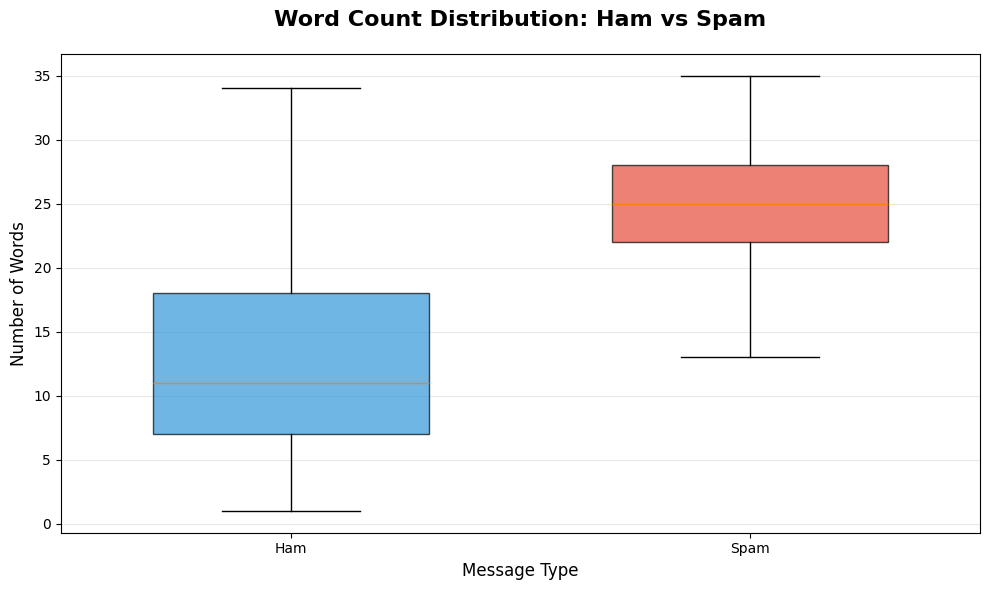

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

box_data = [ham_words, spam_words]
positions = [1, 2]
labels = ['Ham', 'Spam']
colors = ['#3498db', '#e74c3c']

bp = ax.boxplot(box_data, positions=positions, labels=labels, patch_artist=True,
                widths=0.6, showfliers=False)

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Word Count Distribution: Ham vs Spam', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Number of Words', fontsize=12)
ax.set_xlabel('Message Type', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [56]:
dataset.loc[:, 'message'] = dataset['message'].fillna('').astype(str)
dataset.loc[:, 'digit_count'] = dataset['message'].apply(lambda x: sum(c.isdigit() for c in x))

/tmp/ipython-input-394894237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'digit_count'] = dataset['message'].apply(lambda x: sum(c.isdigit() for c in x))


In [57]:
char_stats = dataset.groupby('label')[['digit_count', 'capital_count']].mean()

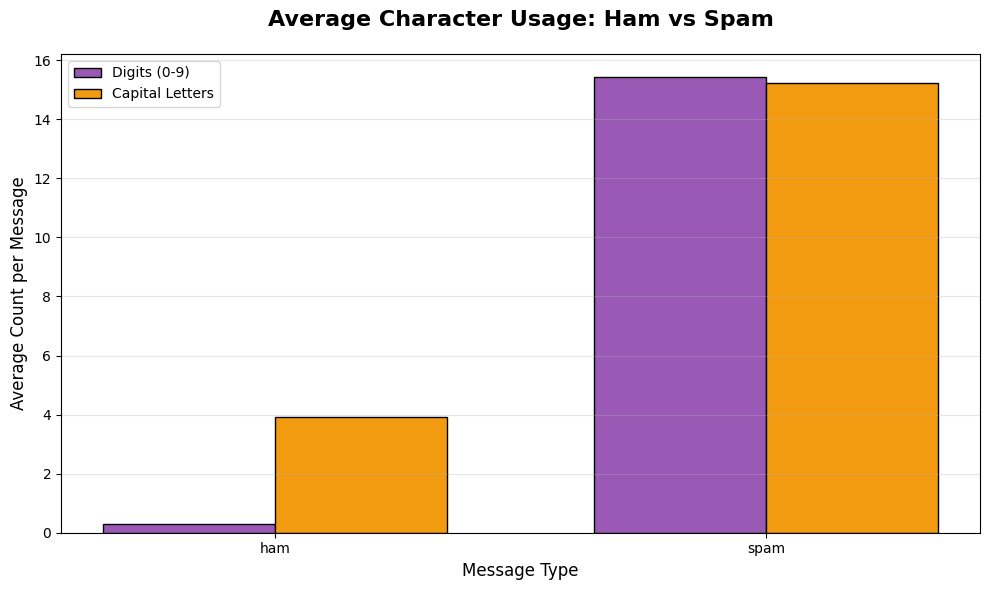

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(char_stats.index))
width = 0.35

bars1 = ax.bar(x - width/2, char_stats['digit_count'], width, label='Digits (0-9)', color='#9b59b6', edgecolor='black')
bars2 = ax.bar(x + width/2, char_stats['capital_count'], width, label='Capital Letters', color='#f39c12', edgecolor='black')

ax.set_title('Average Character Usage: Ham vs Spam', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Average Count per Message', fontsize=12)
ax.set_xlabel('Message Type', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(char_stats.index)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              5169 non-null   object
 1   message            5169 non-null   object
 2   length             5169 non-null   int64 
 3   exclamation_count  5169 non-null   int64 
 4   question_count     5169 non-null   int64 
 5   capital_count      5169 non-null   int64 
 6   word_count         5169 non-null   int64 
 7   digit_count        5169 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 363.4+ KB


In [60]:
def preprocessing_text(text):
  text = text.lower()
  text = ' '.join(text.split())
  return text

In [61]:
dataset.loc[:, "Cleaned Msgs"] = dataset["message"].apply(preprocessing_text)

/tmp/ipython-input-3987401503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, "Cleaned Msgs"] = dataset["message"].apply(preprocessing_text)


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              5169 non-null   object
 1   message            5169 non-null   object
 2   length             5169 non-null   int64 
 3   exclamation_count  5169 non-null   int64 
 4   question_count     5169 non-null   int64 
 5   capital_count      5169 non-null   int64 
 6   word_count         5169 non-null   int64 
 7   digit_count        5169 non-null   int64 
 8   Cleaned Msgs       5169 non-null   object
dtypes: int64(6), object(3)
memory usage: 403.8+ KB


In [63]:
dataset

,label,message,length,exclamation_count,question_count,capital_count,word_count,digit_count,Cleaned Msgs
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0,3,20,0,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,29,0,0,2,6,0,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,0,0,10,28,25,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,0,0,2,11,0,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0,2,13,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1,0,9,30,21,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,37,0,1,2,8,0,will ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0,1,2,10,0,"pity, * was in mood for that. so...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,125,0,0,2,26,0,the guy did some bitching but i acted like i'd...


In [64]:
from sklearn.model_selection import train_test_split
X = dataset["Cleaned Msgs"]
Y = dataset["label"]

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

In [66]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4135,)
(4135,)
(1034,)
(1034,)


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000, ngram_range=(1, 2), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [68]:
print(f"Training features shape: {X_train_tfidf.shape}")
print(f"Test features shape: {X_test_tfidf.shape}")

Training features shape: (4135, 3000)
Test features shape: (1034, 3000)


### Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [70]:
nb_model = MultinomialNB(alpha = 0.1)
nb_model.fit(X_train_tfidf, Y_train)

MultinomialNB(alpha=0.1)

In [71]:
Y_pred_nb = nb_model.predict(X_test_tfidf)

In [72]:
print("NAIVE BAYES RESULTS")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_nb):.4f}")

NAIVE BAYES RESULTS
Accuracy: 0.9826


In [73]:
print("Classification Report:")
print(classification_report(Y_test, Y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_nb))

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       903
        spam       0.98      0.88      0.93       131

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Confusion Matrix:
[[901   2]
 [ 16 115]]


### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train_tfidf, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [76]:
Y_pred_lr = lr_model.predict(X_test_tfidf)

In [77]:
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_lr):.4f}")

Accuracy: 0.9816


In [78]:
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       903
        spam       0.94      0.91      0.93       131

    accuracy                           0.98      1034
   macro avg       0.97      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [79]:
print(confusion_matrix(Y_test, Y_pred_lr))

[[896   7]
 [ 12 119]]


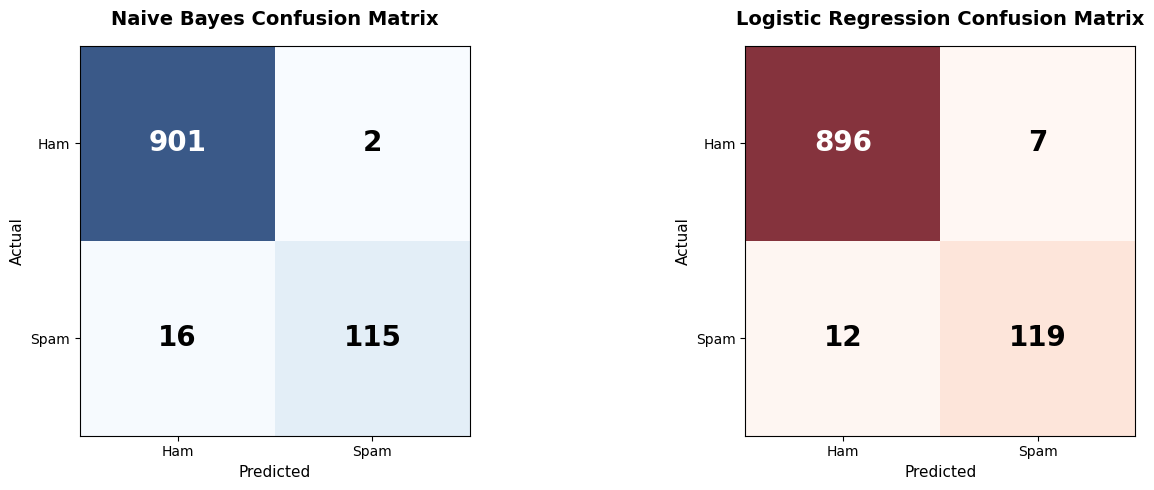

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm_nb = confusion_matrix(Y_test, Y_pred_nb)
cm_lr = confusion_matrix(Y_test, Y_pred_lr)

labels = ['Ham', 'Spam']

im1 = axes[0].imshow(cm_nb, cmap='Blues', alpha=0.8)
axes[0].set_title('Naive Bayes Confusion Matrix', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(labels)
axes[0].set_yticklabels(labels)
axes[0].set_xlabel('Predicted', fontsize=11)
axes[0].set_ylabel('Actual', fontsize=11)

for i in range(2):
    for j in range(2):
        text = axes[0].text(j, i, cm_nb[i, j],
                           ha="center", va="center",
                           color="white" if cm_nb[i, j] > cm_nb.max()/2 else "black",
                           fontsize=20, fontweight='bold')

im2 = axes[1].imshow(cm_lr, cmap='Reds', alpha=0.8)
axes[1].set_title('Logistic Regression Confusion Matrix', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(labels)
axes[1].set_yticklabels(labels)
axes[1].set_xlabel('Predicted', fontsize=11)
axes[1].set_ylabel('Actual', fontsize=11)

for i in range(2):
    for j in range(2):
        text = axes[1].text(j, i, cm_lr[i, j],
                           ha="center", va="center",
                           color="white" if cm_lr[i, j] > cm_lr.max()/2 else "black",
                           fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

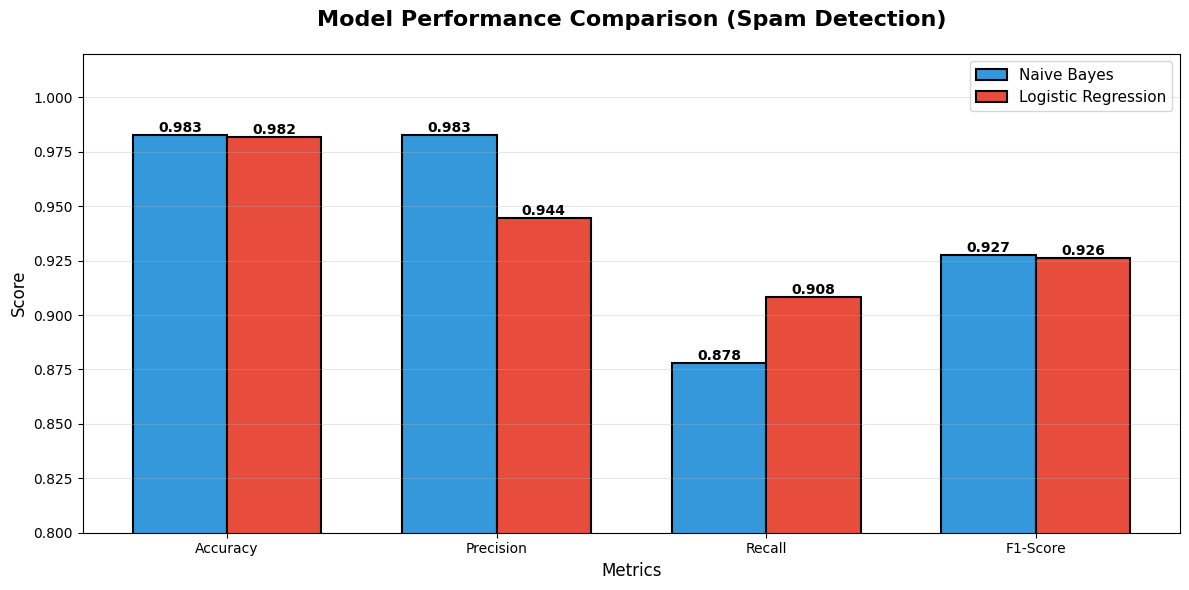

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    'Accuracy': [
        accuracy_score(Y_test, Y_pred_nb),
        accuracy_score(Y_test, Y_pred_lr)
    ],
    'Precision': [
        precision_score(Y_test, Y_pred_nb, pos_label='spam'),
        precision_score(Y_test, Y_pred_lr, pos_label='spam')
    ],
    'Recall': [
        recall_score(Y_test, Y_pred_nb, pos_label='spam'),
        recall_score(Y_test, Y_pred_lr, pos_label='spam')
    ],
    'F1-Score': [
        f1_score(Y_test, Y_pred_nb, pos_label='spam'),
        f1_score(Y_test, Y_pred_lr, pos_label='spam')
    ]
}

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

nb_scores = [metrics[m][0] for m in metrics.keys()]
lr_scores = [metrics[m][1] for m in metrics.keys()]

bars1 = ax.bar(x - width/2, nb_scores, width, label='Naive Bayes',
               color='#3498db', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, lr_scores, width, label='Logistic Regression',
               color='#e74c3c', edgecolor='black', linewidth=1.5)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_title('Model Performance Comparison (Spam Detection)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Score', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(metrics.keys())
ax.legend(fontsize=11)
ax.set_ylim(0.8, 1.02)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [83]:
import json
from datetime import datetime
import pickle

In [85]:
model_filename = 'spam_detector.pkl'

with open(model_filename, 'wb') as f:
    pickle.dump(nb_model, f)

print(f"Model saved: {model_filename}")

# Check file size
import os
model_size = os.path.getsize(model_filename) / (1024 * 1024)  # Convert to MB
print(f"   File size: {model_size:.2f} MB")

Model saved: spam_detector.pkl
   File size: 0.09 MB


In [86]:
nb_precision = precision_score(Y_test, Y_pred_nb, pos_label='spam')
nb_recall = recall_score(Y_test, Y_pred_nb, pos_label='spam')
nb_f1 = f1_score(Y_test, Y_pred_nb, pos_label='spam')

model_metadata = {
    'model_info': {
        'name': 'Spam Email Detector',
        'model_type': 'MultinomialNB',
        'version': '1.0',
        'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'description': 'Naive Bayes classifier for spam email detection'
    },

    'model_parameters': {
        'alpha': 0.1
    },

    'preprocessing': {
        'vectorization': 'TF-IDF',
        'max_features': 3000,
        'ngram_range': [1, 2],
        'min_df': 2,
        'text_processing': [
            'Lowercase conversion',
            'Whitespace normalization',
            'Punctuation preserved'
        ]
    },

    'performance_metrics': {
        'accuracy': float(accuracy_score(Y_test, Y_pred_nb)),
        'precision': float(nb_precision),
        'recall': float(nb_recall),
        'f1_score': float(nb_f1),
        'confusion_matrix': {
            'true_negatives': int(cm_nb[0][0]),   # True Ham
            'false_positives': int(cm_nb[0][1]),  # Ham classified as Spam
            'false_negatives': int(cm_nb[1][0]),  # Spam classified as Ham
            'true_positives': int(cm_nb[1][1])    # True Spam
        }
    },

    'dataset_info': {
        'total_samples': len(dataset),
        'train_samples': len(X_train),
        'test_samples': len(X_test),
        'ham_count': int(dataset['label'].value_counts()['ham']),
        'spam_count': int(dataset['label'].value_counts()['spam']),
        'spam_percentage': float(dataset['label'].value_counts(normalize=True)['spam'] * 100)
    },

    'label_mapping': {
        'ham': 'Legitimate Email',
        'spam': 'Spam Email'
    },

    'usage_recommendations': {
        'best_for': 'Email clients prioritizing user experience',
        'strength': 'High precision - minimizes false positives',
        'consideration': 'May miss some spam (88% recall) but rarely flags legitimate emails as spam'
    }
}

# Save metadata
metadata_filename = 'naive_bayes_metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(model_metadata, f, indent=2)

print(f"✅ Metadata saved: {metadata_filename}")

✅ Metadata saved: naive_bayes_metadata.json
